## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
import pickle

## Read Dataset

In [ ]:
df = pd.read_excel('Data_Train.xlsx')

In [ ]:
df.head()

,STORY,SECTION
0,But the most painful was the huge reversal in ...,3
1,How formidable is the opposition alliance amon...,0
2,Most Asian currencies were trading lower today...,3
3,"If you want to answer any question, click on ‘...",1
4,"In global markets, gold prices edged up today ...",3


### We have 2 columns : one having the story and the other one is the type of story(section)

### 0 : Politics  1: Technology  2: Entertainment  3: Business

In [ ]:
df.shape

(7628, 2)

### Check missing values

In [ ]:
df.isnull().sum()

STORY      0
SECTION    0
dtype: int64

### Use count plot to see the balance in the section column

Text(0.5, 1.0, 'News Categories')

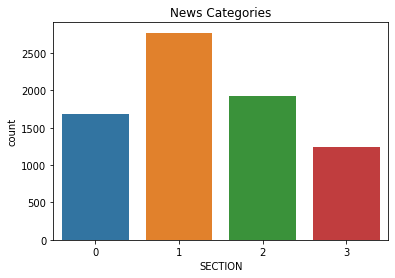

In [ ]:
sns.countplot(x='SECTION',data=df).set_title('News Categories')

In [ ]:
df['SECTION'].value_counts()

1    2772
2    1924
0    1686
3    1246
Name: SECTION, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


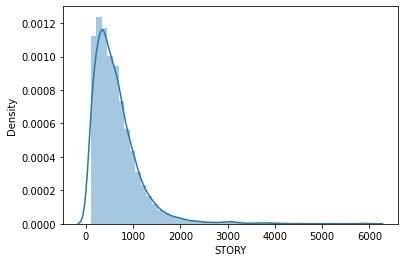

In [ ]:
sns.distplot(df['STORY'].str.len())

### Word Cloud

In [ ]:
! pip install WordCloud

In [ ]:
def create_wordcloud(words):
    wordcloud = WordCloud(random_state=21, max_font_size=110).generate(words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()


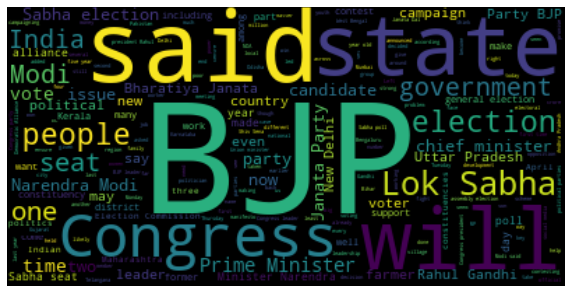

In [ ]:
# Politics
subset=df[df.SECTION==0]
text=subset.STORY.values
words =" ".join(text)
create_wordcloud(words)

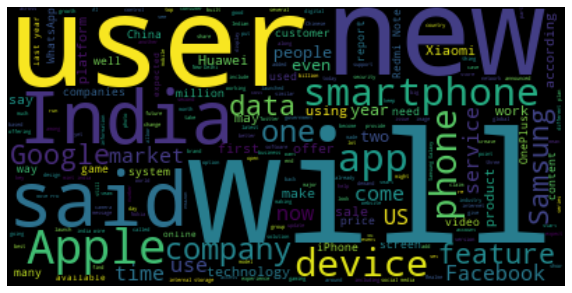

In [ ]:
# Technology
subset=df[df.SECTION==1]
text=subset.STORY.values
words =" ".join(text)
create_wordcloud(words)

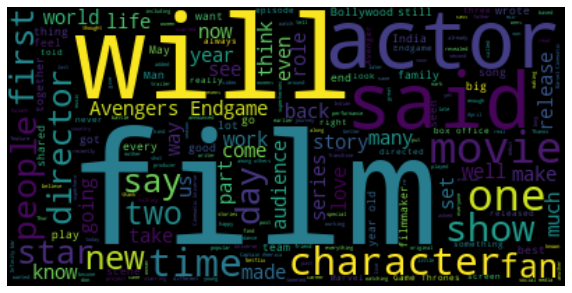

In [ ]:
# Entertainment
subset=df[df.SECTION==2]
text=subset.STORY.values
words =" ".join(text)
create_wordcloud(words)

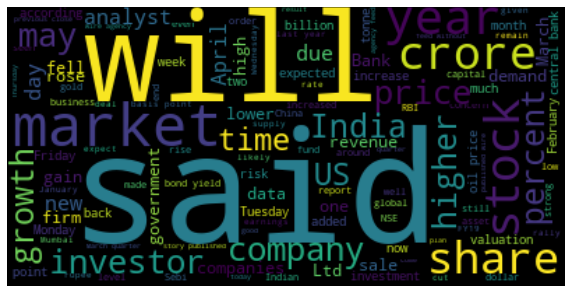

In [ ]:
# Business
subset=df[df.SECTION==3]
text=subset.STORY.values
words =" ".join(text)
create_wordcloud(words)

## Text Preparation

In [ ]:
def clean_text(text):
  # Lowercase and remove \r & \n
  text = text.lower().replace("\r","").replace("\n"," ").strip()
  # Remove multiple spaces
  text = re.sub(r'[^a-z\s]','',text)   # Takes care of other unwanted symbols.
  text = re.sub(' +',' ',text)
  # Tokenize the text
  word_tokens = word_tokenize(text)
  # Apply Lemmatization
  lemmatized_list=[]
  wordnet_lemmatizer=WordNetLemmatizer()
  for word in word_tokens:
      lemmatized_list.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
  # Remove unwanted/common words
  stop_words = set(stopwords.words('english'))
  #stop_words.add('say')
  filtered_sentence = [w for w in lemmatized_list if not w in stop_words] 
  text = " ".join(filtered_sentence)
  return text

In [ ]:
! pip install nltk

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
df['story_parsed'] = df['STORY'].apply(clean_text)

In [ ]:
df.head()

,STORY,SECTION,story_parsed
0,But the most painful was the huge reversal in ...,3,painful huge reversal fee income unheard among...
1,How formidable is the opposition alliance amon...,0,formidable opposition alliance among congress ...
2,Most Asian currencies were trading lower today...,3,asian currencies trade lower today south korea...
3,"If you want to answer any question, click on ‘...",1,want answer question click answer click answer...
4,"In global markets, gold prices edged up today ...",3,global market gold price edge today disappoint...


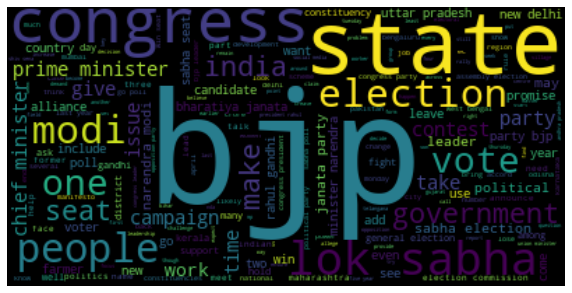

In [ ]:
# Politics
subset=df[df.SECTION==0]
text=subset.story_parsed.values
words =" ".join(text)
create_wordcloud(words)

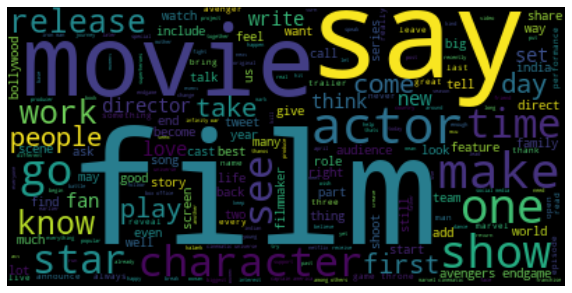

In [ ]:
# Entertainment
subset=df[df.SECTION==2]
text=subset.story_parsed.values
words =" ".join(text)
create_wordcloud(words)

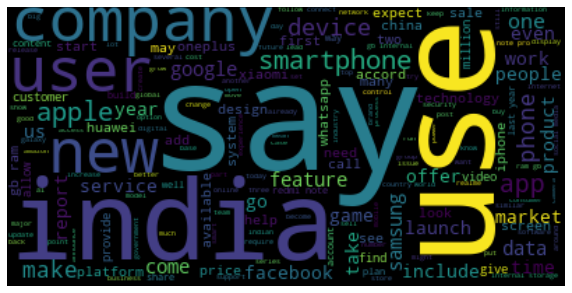

In [ ]:
# Technology
subset=df[df.SECTION==1]
text=subset.story_parsed.values
words =" ".join(text)
create_wordcloud(words)

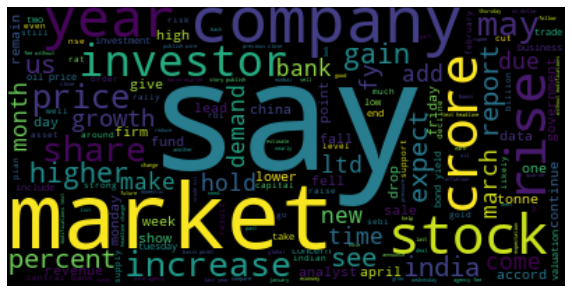

In [ ]:
# Business
subset=df[df.SECTION==3]
text=subset.story_parsed.values
words =" ".join(text)
create_wordcloud(words)

In [ ]:
df_processed = df.iloc[:,1:]

In [ ]:
df_processed.head()

,SECTION,story_parsed
0,3,painful huge reversal fee income unheard among...
1,0,formidable opposition alliance among congress ...
2,3,asian currencies trade lower today south korea...
3,1,want answer question click answer click answer...
4,3,global market gold price edge today disappoint...


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


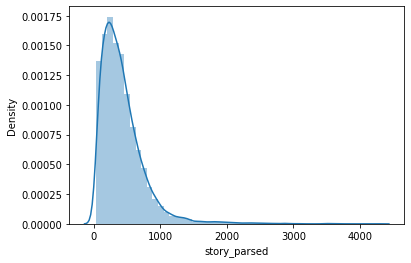

In [ ]:
sns.distplot(df['story_parsed'].str.len())  # After preprocessing

In [ ]:
df['story_parsed']

0       painful huge reversal fee income unheard among...
1       formidable opposition alliance among congress ...
2       asian currencies trade lower today south korea...
3       want answer question click answer click answer...
4       global market gold price edge today disappoint...
                              ...                        
7623    karnataka congress bastion also give bjp first...
7624    film also feature janhvi kapoor revolve around...
7625    database create bring together criminal record...
7626    state uneasy relationship mainland since days ...
7627    virus star kunchacko boban tovino thomas indra...
Name: story_parsed, Length: 7628, dtype: object

In [ ]:
df_processed.to_csv('Data_preprocessed.csv')

In [ ]:
# Split into training and test data
X_train,X_test,y_train,y_test = train_test_split(df['story_parsed'],df['SECTION'],test_size=0.25,random_state=2)

## TF-IDF Vectorization

In [ ]:
ngrams_range = (1,2)
min_df = 10
max_df = 1.0
max_features = 250
norm = 'l2'  

In [ ]:
tfidf = TfidfVectorizer(encoding='utf-8',
                        stop_words=None,
                        lowercase = False,
                        max_df = max_df,
                        min_df = min_df,
                        max_features = max_features,
                        norm = norm,
                        sublinear_tf = 'true')


In [ ]:
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.15742063 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [ ]:
features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)

(1907, 250)


### Builing Models

#### Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model  = RandomForestClassifier(random_state=1)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.9202936549554274
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       420
           1       0.93      0.94      0.93       710
           2       0.90      0.92      0.91       466
           3       0.91      0.88      0.90       311

    accuracy                           0.92      1907
   macro avg       0.92      0.92      0.92      1907
weighted avg       0.92      0.92      0.92      1907



In [ ]:
pickle.dump(model,open('new_article_classification.pkl', 'wb'))

### Hyper Parameter Tuning 

In [ ]:
from sklearn.model_selection import GridSearchCV
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(model, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(features_train, labels_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 26.3min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 48.6min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 62.4min finished


In [ ]:
bestF.best_params_

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 1200}

In [ ]:
model  = RandomForestClassifier(random_state=1,max_depth=150,n_estimators=1500,criterion='entropy')
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.9121887287024901
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       165
           1       0.95      0.92      0.94       284
           2       0.83      0.92      0.87       178
           3       0.91      0.87      0.89       136

    accuracy                           0.91       763
   macro avg       0.91      0.91      0.91       763
weighted avg       0.91      0.91      0.91       763



In [ ]:
pickle.dump(model,open('new_article_classification.pkl', 'wb'))

### Logistic Regression

In [ ]:
model = LogisticRegression()
print(model.get_params())
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Accuracy:  0.9255374934452019
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       420
           1       0.93      0.93      0.93       710
           2       0.89      0.94      0.92       466
           3       0.92      0.92      0.92       311

    accuracy                           0.93      1907
   macro avg       0.93      0.92      0.92      1907
weighted avg       0.93      0.93      0.93      1907



In [ ]:
pickle.dump(model,open('new_article_classification.pkl', 'wb'))

## Evaluation with test data

In [ ]:
df_test = pd.read_excel('Data_Test.xlsx')

In [ ]:
df_test

,STORY
0,2019 will see gadgets like gaming smartphones ...
1,It has also unleashed a wave of changes in the...
2,It can be confusing to pick the right smartpho...
3,The mobile application is integrated with a da...
4,We have rounded up some of the gadgets that sh...
...,...
2743,"According to researchers, fraud in the mobile ..."
2744,The iPhone XS and XS Max share the Apple A12 c...
2745,"On the photography front, the Note 5 Pro featu..."
2746,UDAY mandated that discoms bring the gap betwe...


In [ ]:
df_test['story_parsed'] = df_test['STORY'].apply(clean_text)

In [ ]:
df_test

,STORY,story_parsed
0,2019 will see gadgets like gaming smartphones ...,see gadgets like game smartphones wearable med...
1,It has also unleashed a wave of changes in the...,also unleash wave change mcu make sure future ...
2,It can be confusing to pick the right smartpho...,confuse pick right smartphone segregate top sm...
3,The mobile application is integrated with a da...,mobile application integrate dashboard confirm...
4,We have rounded up some of the gadgets that sh...,round gadgets show leave indelible mark consum...
...,...,...
2743,"According to researchers, fraud in the mobile ...",accord researchers fraud mobile channel grow s...
2744,The iPhone XS and XS Max share the Apple A12 c...,iphone xs xs max share apple chipset along mpm...
2745,"On the photography front, the Note 5 Pro featu...",photography front note pro feature mp mp dual ...
2746,UDAY mandated that discoms bring the gap betwe...,uday mandate discoms bring gap average revenue...


In [ ]:
features_test_set = tfidf.transform(df_test['story_parsed']).toarray()
print(features_test_set)

[[0.         0.         0.         ... 0.         0.18781405 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.23347629 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.14005729 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.35464971 ... 0.         0.         0.        ]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model  = RandomForestClassifier(random_state=1)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print(model_predictions)
model_predictions_df = pd.DataFrame(model_predictions,columns=['SECTION'])
print(model_predictions_df)
# print('Accuracy: ', accuracy_score(labels_test, model_predictions))
# print(classification_report(labels_test, model_predictions))

[1 1 1 ... 1 1 0]
      SECTION
0           1
1           1
2           1
3           1
4           0
...       ...
1902        1
1903        2
1904        1
1905        1
1906        0

[1907 rows x 1 columns]


In [ ]:
model_predictions_df.to_csv('divyang_submission.csv')

In [ ]:
model_nb = MultinomialNB()
print(model_nb.get_params())
model_nb.fit(features_train, labels_train)
model_nb_predictions = model_nb.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_nb_predictions))
print(classification_report(labels_test, model_nb_predictions))

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}
Accuracy:  0.9045621394861039
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       420
           1       0.88      0.93      0.91       710
           2       0.91      0.85      0.87       466
           3       0.93      0.91      0.92       311

    accuracy                           0.90      1907
   macro avg       0.91      0.90      0.91      1907
weighted avg       0.91      0.90      0.90      1907



In [ ]:
model = LogisticRegression()
print(model.get_params())
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test_set)
model_predictions_df = pd.DataFrame(model_predictions,columns=['SECTION'])
print(model_predictions_df)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
      SECTION
0           1
1           2
2           1
3           1
4           1
...       ...
2743        1
2744        1
2745        1
2746        3
2747        1

[2748 rows x 1 columns]


In [ ]:
model_predictions_df.to_csv('rdk3_submission_logistic.csv')